This project aims to provide answers to the following questions

What percentage of all licensed sets ever released were Stars Wars themed?

In which year was Star Wars not the most popular liecensed theme(in terms of number of sets released that year). 

Meta data :

lego_sets.csv

set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!

set_name: A name for every set in the dataset (note that this can be the same for different sets).

year: The date the set was released.

num_parts: The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.

theme_name: The name of the sub-theme of the set.

parent_theme: The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.

parent_themes.csv

id: A code that is unique to every theme.

name: The name of the parent theme.

is_licensed: A Boolean column specifying whether the theme is a licensed theme.

In [1]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

pd.set_option('display.max_column', 10)

In [2]:
lego_df = pd.read_csv('lego_sets.csv')
p_themes_df = pd.read_csv('parent_themes.csv')

In [3]:
lego_df.shape

(11986, 6)

In [4]:
lego_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [5]:
p_themes_df.shape

(111, 3)

In [6]:
p_themes_df.columns

Index(['id', 'name', 'is_licensed'], dtype='object')

In [7]:
p_themes_df.rename(columns = {'name' : 'parent_theme'}, inplace= True)

In [8]:
new_df = pd.merge(lego_df, p_themes_df, on = 'parent_theme')

In [9]:
new_df.rename(columns={'set_num' : 'set_id',
                     'name' : 'set_name',
                     'theme_name' : 'sub_theme_name',
                     'id' : 'parent_theme_id'}, inplace = True)

In [10]:
new_df

,set_id,set_name,year,num_parts,sub_theme_name,parent_theme,parent_theme_id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [11]:
new_df['set_id'].isna().sum()

153

set_id column is a critical column hence we need to drop these 153 records for which set_id is missing

In [12]:
new_df = new_df.loc[~new_df['set_id'].isna()]

In [13]:
new_df.shape

(11833, 8)

In [14]:
# check for dupliocates
new_df.loc[new_df.duplicated()].count()

set_id             0
set_name           0
year               0
num_parts          0
sub_theme_name     0
parent_theme       0
parent_theme_id    0
is_licensed        0
dtype: int64

no duplicates are present in dataset

In [15]:
new_df.reset_index(inplace=True)
new_df.drop(columns='index', inplace=True)

c:\Users\sudhn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
new_df

,set_id,set_name,year,num_parts,sub_theme_name,parent_theme,parent_theme_id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False
...,...,...,...,...,...,...,...,...
11828,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11829,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11830,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11831,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


Question 1

In [17]:
# for all liecensed sets select all rows for is_liecensed is equal to True
liecensed_df = new_df.loc[new_df['is_licensed'] == True]

In [18]:
liecensed_df.reset_index(inplace=True)
liecensed_df.drop(columns=['index'], inplace=True)

c:\Users\sudhn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
liecensed_df

,set_id,set_name,year,num_parts,sub_theme_name,parent_theme,parent_theme_id,is_licensed
0,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
1,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
2,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
4,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
1174,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
1175,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
1176,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
1177,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


In [20]:
liecensed_df.shape

(1179, 8)

In [21]:
sets_count_df = liecensed_df['parent_theme'].value_counts()
sets_count_df = sets_count_df.to_frame('num_of_sets_released')

In [22]:
sets_count_df

,num_of_sets_released
Star Wars,609
Super Heroes,242
Harry Potter,67
The Hobbit and Lord of the Rings,40
Minecraft,30
Disney Princess,29
Cars,27
Teenage Mutant Ninja Turtles,21
Indiana Jones,19
Pirates of the Caribbean,17


In [23]:
number_of_sw_sets = sets_count_df['num_of_sets_released']['Star Wars']
total_sets = sets_count_df['num_of_sets_released'].sum()

In [24]:
print(number_of_sw_sets, total_sets)

609 1179


In [25]:
sw_percentage = number_of_sw_sets / total_sets * 100
sw_percentage = round(sw_percentage, 2)

In [26]:
sw_percentage

51.65

Question 2

In [27]:
groups_by_year = liecensed_df.groupby('year')

In [28]:
groups_by_year.indices

{1999: array([178, 182, 183, 187, 191, 192, 193, 197, 198, 203, 204, 209, 212],
       dtype=int64),
 2000: array([  70,   71,   72,   73,   74,  180,  185,  188,  195,  201,  207,
         208,  213,  214,  215,  217,  218,  471,  472,  473,  593,  603,
         604,  606,  607,  608, 1144, 1145, 1146, 1147, 1148], dtype=int64),
 2001: array([  0,   1, 139, 140, 141, 181, 189, 190, 202, 211, 216, 474, 475,
        605, 857, 858, 859, 860, 861, 862, 863, 864, 870, 871, 872],
       dtype=int64),
 2002: array([  2,   3,  75, 142, 143, 144, 179, 184, 186, 194, 196, 199, 200,
        205, 206, 210, 219, 220, 221, 222, 223, 476, 477, 478, 479, 565,
        566, 567, 609, 612, 613, 865, 866, 867, 873, 874, 875, 876, 877,
        878, 879, 880, 907, 908, 909, 910, 911, 912, 916, 917], dtype=int64),
 2003: array([  4,   5,  69,  76,  78,  79,  80,  81,  83,  84,  85,  86,  87,
         89,  90,  91,  92,  93,  94,  95,  96, 101, 103, 105, 107, 108,
        559, 560, 561, 562, 563, 602, 652, 6

In [29]:
years_dict = groups_by_year.indices

In [30]:
series_list = []
for k in years_dict.keys():
    s = liecensed_df.loc[years_dict[k]]['parent_theme'].value_counts()
    s = s.to_frame(name = str(k))
    series_list.append(s)

year_df = pd.concat(series_list, axis = 1)

In [31]:
year_df

,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017
Star Wars,13.0,26.0,14.0,28.0,32.0,...,35.0,45.0,58.0,61.0,55.0
Disney's Mickey Mouse,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Harry Potter,NaN,NaN,11.0,19.0,3.0,...,NaN,NaN,NaN,NaN,NaN
Super Heroes,NaN,NaN,NaN,3.0,5.0,...,19.0,23.0,28.0,33.0,72.0
SpongeBob SquarePants,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Avatar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Indiana Jones,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Toy Story,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Prince of Persia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Ben 10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [32]:
year_df = year_df.fillna(0)

In [33]:
year_df

,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017
Star Wars,13.0,26.0,14.0,28.0,32.0,...,35.0,45.0,58.0,61.0,55.0
Disney's Mickey Mouse,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Harry Potter,0.0,0.0,11.0,19.0,3.0,...,0.0,0.0,0.0,0.0,0.0
Super Heroes,0.0,0.0,0.0,3.0,5.0,...,19.0,23.0,28.0,33.0,72.0
SpongeBob SquarePants,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Avatar,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Indiana Jones,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Toy Story,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Prince of Persia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
Ben 10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [34]:
top_five_list = []
for y in year_df.columns.tolist():
    t_df = year_df[y].sort_values(ascending=False).head(5)
    t_df = t_df.to_frame(name = y)
    top_five_list.append(t_df)

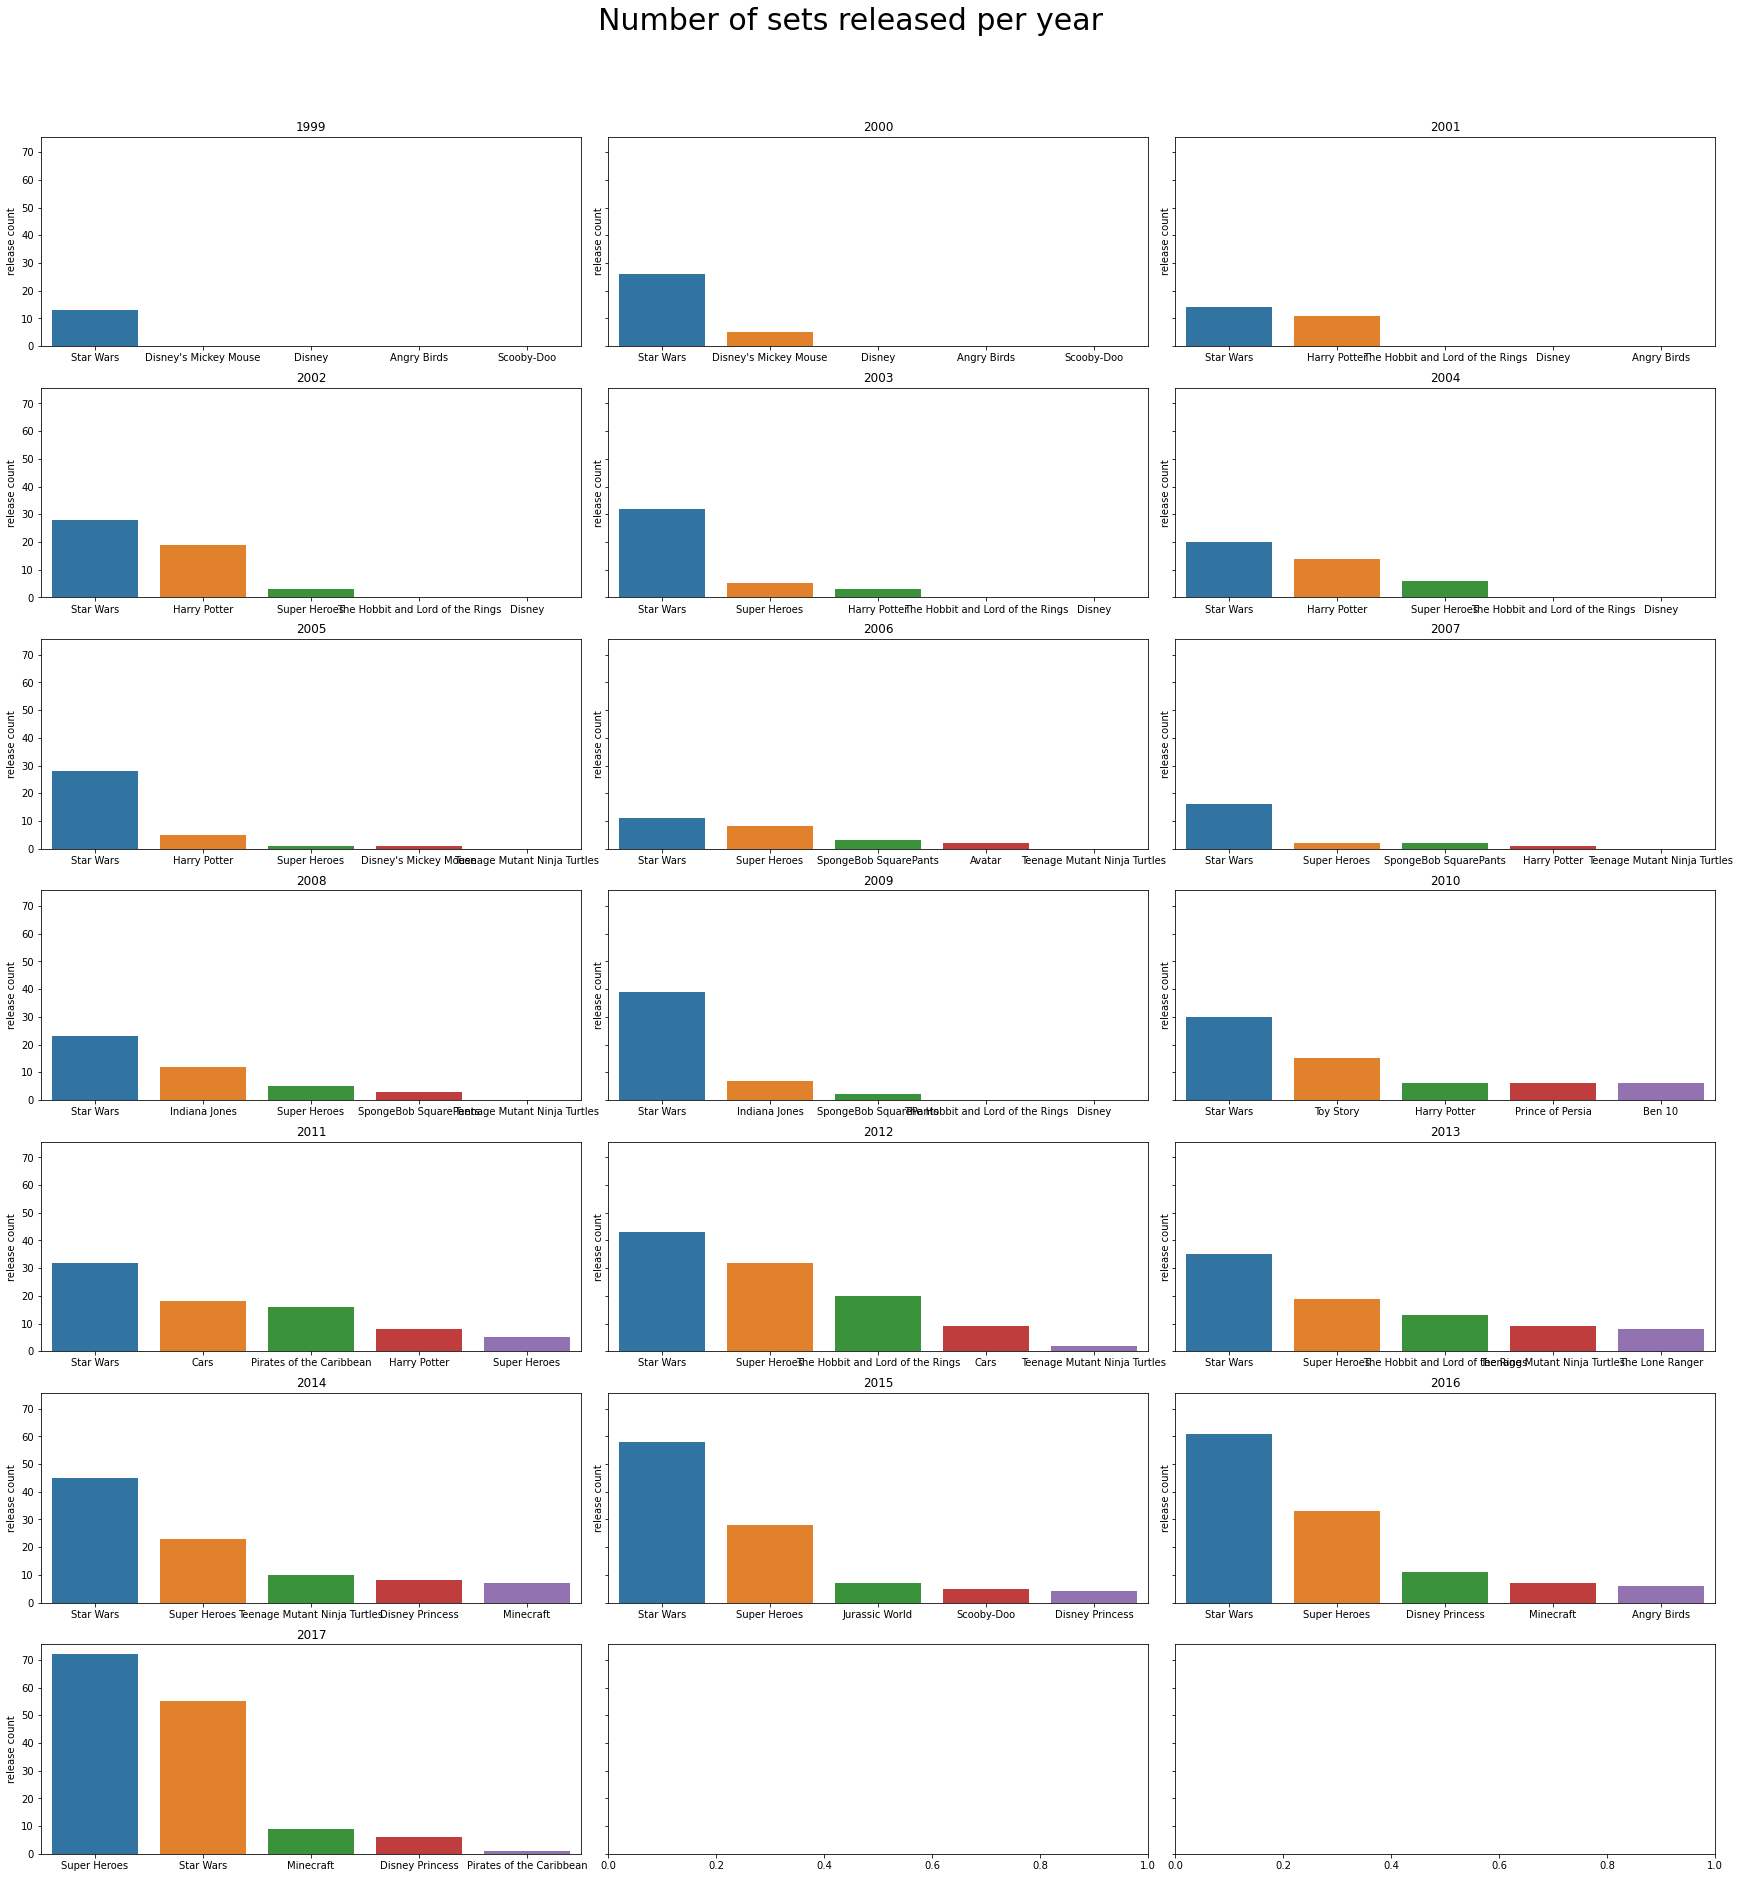

In [35]:
fig, axs = plt.subplots(7, 3, figsize = (30, 30), sharey=True)
axs.flatten()
fig.suptitle('Number of sets released per year', fontsize = 30)

i = 0
for r in range(7):
    for c in range(3):
        if(i < 19):
            temp_df = top_five_list[i]
            sns.barplot(ax=axs[r, c], data=temp_df, x=temp_df.index, y=temp_df.columns[0])
            axs[r, c].set_ylabel('release count')
            axs[r, c].set_title(f'{temp_df.columns[0]}')
            i = i + 1
        else:
            break

plt.subplots_adjust(top = 0.92, wspace=0.05)
plt.show()

Insights from the visual

From the subplot we can see for the year 2017 Star Wars was not the most popular liecensed theme, for year 2017 the most popular liecensed theme was superheroes